Troy Mazerolle

Student Number: 8972394

# Lab 6 - Logistic Regression

In [155]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

1. Using SciKit-Learn, train a binary logistic regression model on the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). Use all four features and define only 2 labels: `virginica` and `non-virginica`. See the logistic regression notebook presented in class for a demonstration on how to set up these labels (3 points).

We will load in the data, convert the target to be either True or False based on what is and is not virginica, split the data into training and testing sets, train the model on the training data, and come up with a prediction on the testing data.

In [156]:
iris = datasets.load_iris(as_frame = True)
X = iris.data
y = iris.target_names[iris.target] == "virginica"

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8972394)

log_reg = LogisticRegression(random_state = 8972394)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

2.1. Failure modes: in which data instances is the model wrong? (1 point)

Let's look at a confusion matrix.

In [157]:
conf_mat = confusion_matrix(y_test, y_pred)
true_negative, false_positive, false_negative, true_positive = conf_mat.ravel()

print("Confusion Matrix:\n", conf_mat)
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)
print("True Positive:", true_positive)

Confusion Matrix:
 [[21  1]
 [ 2 14]]
True Negative: 21
False Positive: 1
False Negative: 2
True Positive: 14


21 observations were correctly classified as non-virginica, and 14 observations were correctly classified as virginica.  1 observation was classified as virginica when it was really non-virginica, and 2 observations were classified as non-virginica when they should have been classified as virginica.

2.2. Are there any shared properties for these cases? (1 point)

To look for shared features, we will start by plotting the histograms of virginica and non-virginica of each feature over each other.

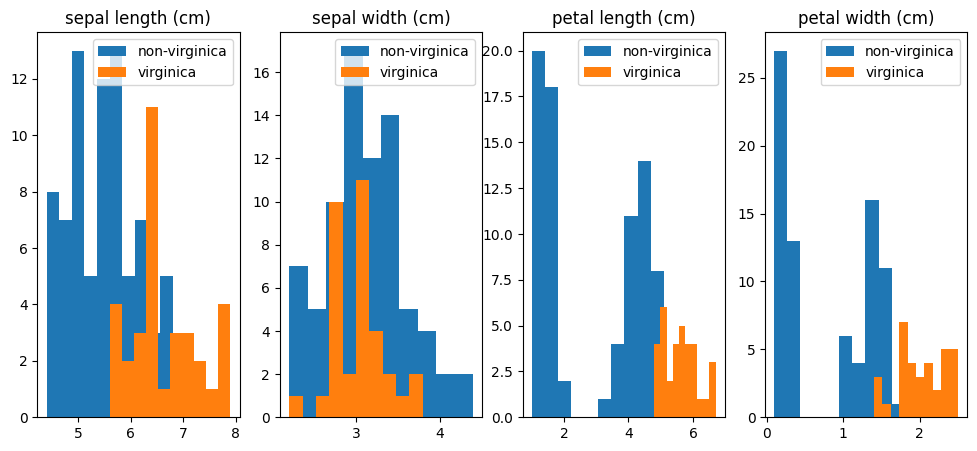

In [158]:
fig, histograms = plt.subplots(1, len(iris.feature_names), figsize = [12, 5])
for i in range(len(iris.feature_names)):
    histograms[i].hist(X_train[iris.feature_names[i]][~y_train])
    histograms[i].hist(X_train[iris.feature_names[i]][y_train])
    histograms[i].set_title(iris.feature_names[i])
    histograms[i].legend(["non-virginica", "virginica"])

For sepal length, petal length, and petal width, we can see a clear distinction between non-virginica and virginica, with some overlap.  I am willing to bet that our misclassified observations have features that lie within or close to this overlap.  To test this, I want to visibly see where on these histograms our misclassified observations fall into.

We will first need to get the features of the misclassified observations, and we can do this by filtering `X_test` for where `y_test` and `y_pred` are not equal.

In [159]:
misclassed_filter = ~(y_test == y_pred)
misclassed_features = X_test[misclassed_filter].reset_index()
misclassed_features_y = y_test[misclassed_filter]
print(misclassed_features_y)

[ True False  True]


The above targets are what the misclassified features SHOULD have been.  That means that every True element was falsly reported as non-virginica and every False element was falsly reported as virginica.

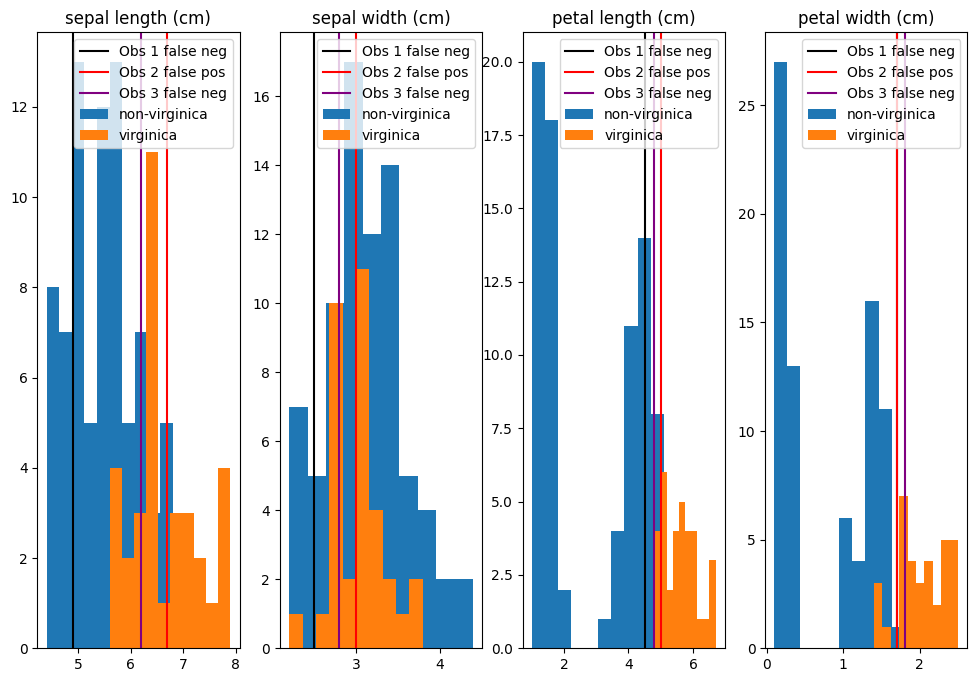

In [160]:
y_misclass = [" "]*len(misclassed_features_y)
for i in range(len(misclassed_features_y)):
    if misclassed_features_y[i]:
        y_misclass[i] = "Obs " + str(i + 1) + " false neg"
    else:
        y_misclass[i] = "Obs " + str(i + 1) + " false pos"

fig, histograms = plt.subplots(1, len(iris.feature_names), figsize = [12, 8])
line_colours = ["black", "red", "purple"]
for i in range(len(iris.feature_names)):
    histograms[i].hist(X_train[iris.feature_names[i]][~y_train])
    histograms[i].hist(X_train[iris.feature_names[i]][y_train])
    histograms[i].set_title(iris.feature_names[i])
    for j in range(len(misclassed_features)):
        histograms[i].axvline(x = misclassed_features[iris.feature_names[i]][j], color = line_colours[j])
    histograms[i].legend([y_misclass[0], y_misclass[1], y_misclass[2], "non-virginica", "virginica", "Measure of Misclassed Obs"])

Above, we have indicated where our misclassified observations are on the histograms with vertical lines.  The colours are a bit difficult to see, but each colour represents a different observation and each vertical line represents the feature value under that feature.  As suspected, our misclassified observations are in or close to the ambiguous areas of the histograms.

While it is difficult to justify exactly how the logistic regression model makes its predictions, the above histograms do give us some insights.  Observation 1, despite being virginica, appears to exhibit a lot of the non-virginica traits, which is likely why it was misclassified as non-virginica.  Observation 2 and 3 look like they could have gone either way. 

3. How is the model doing across a set of evaluation metrics: _accuracy_ and _confusion metric_. (1 point)

Going back to the answer in 2.1, we have the following confusion matrix:

In [161]:
print("Confusion Matrix:\n", conf_mat)
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)
print("True Positive:", true_positive)

Confusion Matrix:
 [[21  1]
 [ 2 14]]
True Negative: 21
False Positive: 1
False Negative: 2
True Positive: 14


We can break this down further into their precision and recall scores.

In [162]:
precision_score = true_positive / (true_positive + false_positive)
recall_score = true_positive / (true_positive + false_negative)
total_accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

print("Precision Score:", precision_score)
print("Recall Score:", recall_score)
print("Total Accuracy:", total_accuracy)

Precision Score: 0.9333333333333333
Recall Score: 0.875
Total Accuracy: 0.9210526315789473


The model has a precision score of about 93.3%, meaning that out of all the observations the model predicted as positive, about 93.3% were actually positive.

The model has a recall score of 87.5%, meaning that out of all the observations that the model SHOULD have predicted as positive, 87.5% were actually predicted as positive.

The total accuracy of the model is about 92.1%, meaning that the model will correctly classify the target as virginica or non-virginica about 92.1% of the time.